<a href="https://colab.research.google.com/github/VIHAN-droid/AI-ML-PROJECT/blob/main/SUPERVISED%20LEARNING/Simple_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/placement (1).csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package')

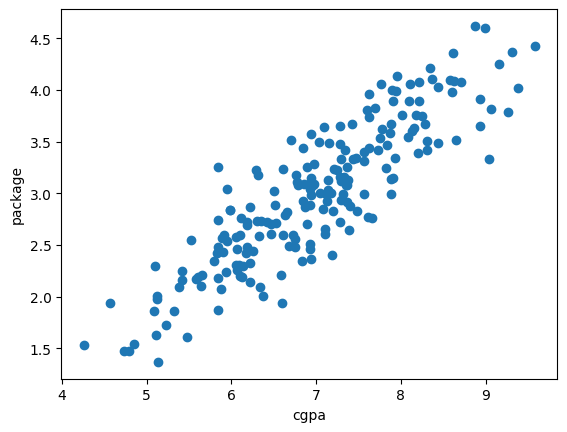

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')

In [ ]:
# FIRST STEP : DIFF THE INPUT AND OUTPUT CLM
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [ ]:
# NEXT STEP : TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.1 , random_state=2)
# test size = 0.1 means 10% of data set is used for testing model

# setting random state to a number -> the result will be same every time that num is used to train

In [ ]:
# NEXT IMPORT LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)  # to train the model

LinearRegression()

In [ ]:
# NEXT CHECKING THE PREDICTIONS
print(x_test)
print(y_test)

     cgpa
112  8.58
29   7.15
182  5.88
199  6.22
193  4.57
85   4.79
10   5.32
54   6.86
115  8.35
35   6.87
12   8.94
92   7.90
13   6.93
126  5.91
174  7.32
2    7.82
44   5.09
3    7.42
113  6.94
14   7.73
112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
Name: package, dtype: float64


In [ ]:
print( lr.predict(x_test.iloc[0:1,:]))
# since indices are as it is copied use iloc to get the 1st index and to pass a dataframe
print(y_test.values[0])

[3.8934864]
4.1


Text(0, 0.5, 'Package')

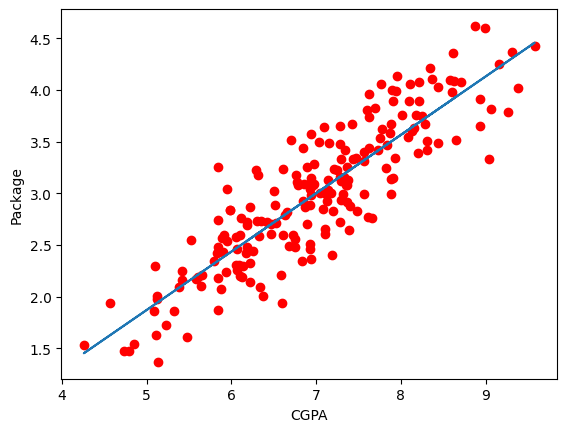

In [ ]:
plt.scatter(df['cgpa'] , df['package'] , color='red')
plt.plot(x_train , lr.predict(x_train) )
plt.xlabel('CGPA')
plt.ylabel('Package')

In [ ]:
slope = lr.coef_
print(slope)

y_intercept = lr.intercept_
print(y_intercept)

[0.56476918]
-0.9522331404870035


# IMPLEMENTING LR FROM SCRATCH



In [ ]:
class LR_scratch:
  def __init__(self):
    m = None
    b = None

  def fit(self,p_train,q_train):
    num = 0
    den = 0
    for i in range(p_train.shape[0]):
      num = num + (p_train[i] - p_train.mean())*(q_train[i] - q_train.mean())
      den += (p_train[i] - p_train.mean())**2
    self.m = num/den
    self.b = q_train.mean() - self.m * p_train.mean()

  def predict(self,testing_val):
    return self.m * testing_val + self.b


In [ ]:
p = df.iloc[:,0:1].values
q = df.iloc[:,-1].values

p_train , p_test , q_train , q_test = train_test_split(p , q , test_size = 0.1 , random_state=2)

lr2 = LR_scratch()
lr2.fit(p_train , q_train)
print(lr2.b)
print(lr2.m)  # values are same as that of scikit library

[-0.95223314]
[0.56476918]


In [ ]:
print(lr2.predict(p_test[0]))
print(q_test[0])   # same as that of scikit library

[3.8934864]
4.1


# REGRESSION METRICS

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_predict = lr.predict(x_test)

In [ ]:
# Mean Absolute Error
print(mean_absolute_error(y_test,y_predict))

0.26530089639951654


In [ ]:
# Mean Squared Error
print(mean_squared_error(y_test, y_predict))

0.09513870266369381


In [ ]:
# Root Mean Squared Error
print(np.sqrt(mean_squared_error(y_test, y_predict)))

0.3084456235119795


In [ ]:
# R2 Score
print(r2_score(y_test, y_predict))

0.8510662353930815


In [ ]:
x_test.shape

(20, 1)

In [ ]:
# Adjusted R2 Score
# n = 20 and k = 1
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - ((1-r2)*(20-1) / (20-1-1))
print(adj_r2)

0.8427921373593638


In [ ]:
# adding random clm to see adj r2 score
new_df1 = df.copy()
new_df1['random_nos'] = np.random.randint(1,100,200)
f = new_df1.iloc[:,0::2]
g = new_df1.iloc[:,-2]

f_train, f_test , g_train , g_test = train_test_split(f , g , test_size=0.1 , random_state=1)
lr.fit(f_train , g_train)

g_predict = lr.predict(f_test)

In [ ]:
f_test.shape

(20, 2)

In [ ]:
r2 = r2_score(g_test, g_predict)
print(r2)

adj_r2 = 1 - ((1-r2)*(20-1) / (20-1-1))
print(adj_r2)

0.7812426194871357
0.7690894316808654
